<a href="https://colab.research.google.com/github/ManasVardhan/ANN_notebooks/blob/master/Improved_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow.keras as tf
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=tf.datasets.cifar10.load_data()
y_test=y_test.flatten()
y_train=y_train.flatten()

170500096/170498071 [==============================] - 6s 0us/step


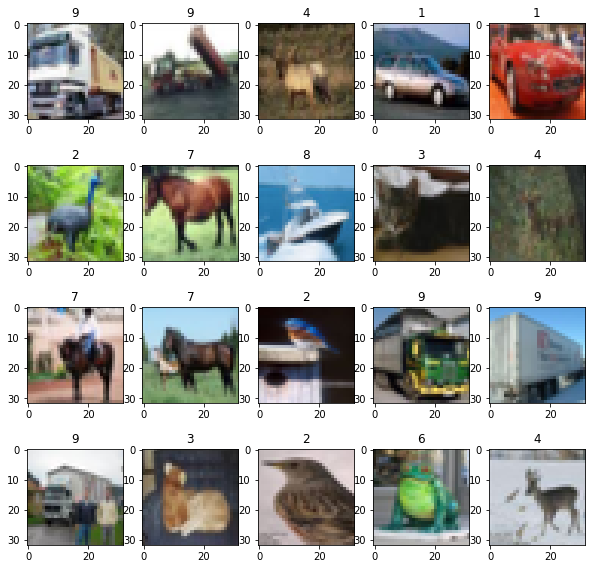

In [3]:
fig=plt.figure(figsize=(10, 10)) 
rows = 4
columns = 5
for i in range(1,rows*columns + 1):
    ax = fig.add_subplot(rows,columns,i)
    imgplot = plt.imshow(x_train[i])
    ax.set_title(y_train[i])
plt.show()

In [4]:
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [5]:
model = tf.Sequential([ tf.layers.Input(x_train[1].shape),
                       tf.layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                       tf.layers.BatchNormalization(),
                       tf.layers.MaxPooling2D((2,2)),
                       tf.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                       tf.layers.BatchNormalization(),
                       tf.layers.MaxPooling2D((2,2)),
                       tf.layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                       tf.layers.BatchNormalization(),
                       tf.layers.MaxPooling2D((2,2)),
                       tf.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                       tf.layers.BatchNormalization(),
                       tf.layers.MaxPooling2D((2,2)),
                       tf.layers.Conv2D(128,(3,3),activation='relu',padding='same'),
                       tf.layers.BatchNormalization(),
                       tf.layers.MaxPooling2D((2,2)),
                       tf.layers.Flatten(),
                       tf.layers.Dense(1024,activation='relu'),
                       tf.layers.Dropout(0.2),
                       tf.layers.Dense(10,activation='softmax')
                      ])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          3

In [7]:
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=25)

Epoch 1/25
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2747 - accuracy: 0.5428 - val_loss: 1.6243 - val_accuracy: 0.4641
Epoch 2/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8788 - accuracy: 0.6902 - val_loss: 1.1005 - val_accuracy: 0.6312
Epoch 3/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7213 - accuracy: 0.7490 - val_loss: 0.7949 - val_accuracy: 0.7318
Epoch 4/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6229 - accuracy: 0.7849 - val_loss: 0.7685 - val_accuracy: 0.7375
Epoch 5/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5368 - accuracy: 0.8148 - val_loss: 0.7877 - val_accuracy: 0.7374
Epoch 6/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4590 - accuracy: 0.8409 - val_loss: 0.8317 - val_accuracy: 0.7341
Epoch 7/25
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4009 - accuracy: 0.8593 - val_loss: 1.3672 - val_ac

In [9]:
# Fit with data augmentation
batch_size = 32
data_generator = tf.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.6809 - accuracy: 0.7745 - val_loss: 0.6682 - val_accuracy: 0.7787
Epoch 2/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.6053 - accuracy: 0.7932 - val_loss: 0.7109 - val_accuracy: 0.7698
Epoch 3/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5772 - accuracy: 0.8026 - val_loss: 0.6470 - val_accuracy: 0.7821
Epoch 4/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5543 - accuracy: 0.8112 - val_loss: 0.7653 - val_accuracy: 0.7566
Epoch 5/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5346 - accuracy: 0.8151 - val_loss: 0.6523 - val_accuracy: 0.7902
Epoch 6/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5256 - accuracy: 0.8179 - val_loss: 0.6879 - val_accuracy: 0.7816
Epoch 7/50
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5082 - accuracy: 0.8246 - val_loss: 0.6127 -

In [10]:
model.save('Improved CIFAR 10')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Improved CIFAR 10/assets
